In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import numpy as np
import plotly.express as px
import datetime
import statsmodels.stats.api as sms
import yellowbrick
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
from yellowbrick.features import parallel_coordinates
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('EDAMortgageDelqncyGrp1train.csv')


In [3]:
train.describe()

,Ln,credit_score,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_ltv,orig_int_rate,curr_ln_delq_stas
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000
mean,1500.500000,763.343333,4.585000,1.015667,73.244667,32.124333,71.986333,4.075333,0.02700
std,866.169729,38.916992,10.202131,0.153065,15.257733,9.923224,15.642625,0.263972,0.16211
min,1.000000,615.000000,0.000000,1.000000,12.000000,3.000000,12.000000,4.000000,0.00000
25%,750.750000,739.000000,0.000000,1.000000,66.000000,24.000000,64.000000,4.000000,0.00000
50%,1500.500000,773.000000,0.000000,1.000000,77.000000,33.000000,75.000000,4.000000,0.00000
75%,2250.250000,794.000000,0.000000,1.000000,80.000000,40.000000,80.000000,4.000000,0.00000
max,3000.000000,825.000000,30.000000,4.000000,96.000000,61.000000,96.000000,5.000000,1.00000


In [4]:
train.describe(include ='all')

,ln_seq_number,Ln,credit_score,first_time_homebuyer_flag,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,orig_ltv,orig_int_rate,property_st,property_type,ln_purpose,curr_ln_delq_stas
count,3000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000,3000,3000,3000.00000
unique,3000,NaN,NaN,2,NaN,NaN,3,NaN,NaN,NaN,NaN,52,4,3,NaN
top,F112Q2010189,NaN,NaN,N,NaN,NaN,P,NaN,NaN,NaN,NaN,CA,SF,N,NaN
freq,1,NaN,NaN,2662,NaN,NaN,2729,NaN,NaN,NaN,NaN,339,2194,1231,NaN
mean,NaN,1500.500000,763.343333,NaN,4.585000,1.015667,NaN,73.244667,32.124333,71.986333,4.075333,NaN,NaN,NaN,0.02700
std,NaN,866.169729,38.916992,NaN,10.202131,0.153065,NaN,15.257733,9.923224,15.642625,0.263972,NaN,NaN,NaN,0.16211
min,NaN,1.000000,615.000000,NaN,0.000000,1.000000,NaN,12.000000,3.000000,12.000000,4.000000,NaN,NaN,NaN,0.00000
25%,NaN,750.750000,739.000000,NaN,0.000000,1.000000,NaN,66.000000,24.000000,64.000000,4.000000,NaN,NaN,NaN,0.00000
50%,NaN,1500.500000,773.000000,NaN,0.000000,1.000000,NaN,77.000000,33.000000,75.000000,4.000000,NaN,NaN,NaN,0.00000
75%,NaN,2250.250000,794.000000,NaN,0.000000,1.000000,NaN,80.000000,40.000000,80.000000,4.000000,NaN,NaN,NaN,0.00000


In [5]:
train.head(10)

,ln_seq_number,Ln,credit_score,first_time_homebuyer_flag,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,orig_ltv,orig_int_rate,property_st,property_type,ln_purpose,curr_ln_delq_stas
0,F112Q2010584,1,812,N,0,1,P,27,19,27,4,IL,SF,N,0
1,F112Q2012947,2,780,N,0,1,P,71,24,71,4,WA,SF,P,0
2,F112Q2009065,3,758,N,0,1,S,77,20,77,4,KY,PU,N,0
3,F112Q2010710,4,804,N,0,1,P,66,28,66,4,PA,SF,C,0
4,F112Q2010330,5,740,N,0,1,P,79,49,79,4,IN,SF,C,0
5,F112Q2011237,6,803,N,0,1,P,69,37,69,4,MO,PU,C,0
6,F112Q2012814,7,714,N,0,1,P,75,33,75,4,WA,SF,N,0
7,F112Q2009343,8,661,N,0,1,S,80,32,80,4,IA,SF,P,0
8,F112Q2012540,9,760,Y,0,1,P,80,31,80,4,MI,SF,P,0
9,F112Q2009414,10,790,N,0,1,P,70,17,70,4,KY,SF,N,0


In [7]:
# Set some variables
number_loans = train.shape[0] 
number_badloans = len(train[train.curr_ln_delq_stas == 1])

# What proportion of the loans are bad?
proportion_badloans = float(number_badloans) / number_loans
print('The proportion of bad loans within 1 year or less is %s.' % proportion_badloans)

The proportion of bad loans within 1 year or less is 0.027.


In [8]:
# How can we determine what proportion of firstime home buyers are bad?
# Let's start by segregating the men and women
firstime = train[train.first_time_homebuyer_flag == "Y"]
firsttime_no = train[train.first_time_homebuyer_flag != "Y"]

# Determine the proportion of women who survived
proportion_firstime = float(len(firstime[firstime.curr_ln_delq_stas== 1])) / len(firstime)
print('The proportion of firstime bad loans is %s.' % proportion_firstime)

# Determine the proportion of men who survived
proportion_firsttime_no = float(len(firsttime_no[firsttime_no.curr_ln_delq_stas == 1])) / len(firsttime_no)
print('The proportion of not firstime bad loans is %s.' % proportion_firsttime_no)

The proportion of firstime bad loans is 0.01775147928994083.
The proportion of not firstime bad loans is 0.028174305033809167.


In [9]:
# 'firstime' is stored as a text value. We should convert (or 'map') it into numeric binaries 
# so it will be ready for scikit-learn.
train['first_time_homebuyer_flag'] = train['first_time_homebuyer_flag'].map({'N': 0,'Y': 1})

In [10]:
# Scikit-learn won't be tolerant of the missing values. 
# the columns - also that have text or are an object
train = train.drop(['ln_seq_number'], axis=1)
train = train.drop(['unit_cnt'], axis=1)
train = train.drop(['occupancy_status'], axis =1)
train = train.drop(['property_st'], axis =1)
train = train.drop(['property_type'], axis =1)
train = train.drop(['ln_purpose'], axis =1)

In [11]:
train.head()

,Ln,credit_score,first_time_homebuyer_flag,mi_percent,orig_cltv,orig_debt_to_inc,orig_ltv,orig_int_rate,curr_ln_delq_stas
0,1,812,0,0,27,19,27,4,0
1,2,780,0,0,71,24,71,4,0
2,3,758,0,0,77,20,77,4,0
3,4,804,0,0,66,28,66,4,0
4,5,740,0,0,79,49,79,4,0


In [12]:
# Load the test data
test = pd.read_csv("EDAMortgageDelqncyGrp1test.csv") 

test.loc[test["first_time_homebuyer_flag"] == "N", "first_time_homebuyer_flag"] = 0
test.loc[test["first_time_homebuyer_flag"] == "Y", "first_time_homebuyer_flag"] = 1

In [13]:
# Initialize our algorithm
lr = LogisticRegression(random_state=1, solver='liblinear')

In [14]:
# Define our predictors
predictors = ["credit_score", "first_time_homebuyer_flag", "orig_debt_to_inc", "mi_percent"]
expected  = train["curr_ln_delq_stas"]

# Train the algorithm using all the training data
lr.fit(train[predictors], expected)

# Make predictions using the training set -- where we already know the correct answers
predicted = lr.predict(train[predictors])

In [15]:
# Make predictions based on the test data
predictions = lr.predict(test[predictors])

# Frame your submission for Kaggle
test_predictions = pd.DataFrame({
        "ln": test["ln"],
        "curr_ln_delq_stas": predictions
    })

test_predictions.head(10)

,ln,curr_ln_delq_stas
0,3001,0
1,3002,0
2,3003,0
3,3004,0
4,3005,0
5,3006,0
6,3007,0
7,3008,0
8,3009,0
9,3010,0


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [17]:
X = train[["credit_score", "first_time_homebuyer_flag", "orig_debt_to_inc", "mi_percent"]]
y = train["curr_ln_delq_stas"]

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the training data to the model
log_reg = lr.fit(X_train, y_train)

In [18]:
# Every estimator has a score method that can judge the quality of the 
# fit (or the prediction) on new data. Bigger is better.   
log_reg.score(X_test, y_test)

0.9733333333333334

In [19]:
from sklearn.metrics import classification_report

In [20]:
expected   = y_test
predicted  = log_reg.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=["Good Loans", "Bad Loans"])
print(classificationReport)

              precision    recall  f1-score   support

  Good Loans       0.97      1.00      0.99       584
   Bad Loans       0.00      0.00      0.00        16

   micro avg       0.97      0.97      0.97       600
   macro avg       0.49      0.50      0.49       600
weighted avg       0.95      0.97      0.96       600



C:\Users\VBACOWELTOJ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [21]:
# Make predictions based on the test data
predictions = log_reg.predict(test[predictors])

# Frame your 2nd submission to Kaggle
kgl_submission_lr = pd.DataFrame({
        "ln": test["ln"],
        "curr_ln_delq_stas": predictions
    })

kgl_submission_lr.to_csv('lr_model.csv', index=False)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
#Random Forest estimator 

In [24]:
# We'll select 50 trees and opt for 'out-of-bag' samples to estimate the generalization error.
rf = RandomForestClassifier(n_estimators=50, oob_score=True) 

In [25]:
# Next split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# ...and then run the 'fit' method to build a forest of trees
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [26]:
rf.score(X_test, y_test)

0.9633333333333334

In [27]:
expected   = y_test
predicted  = rf.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=["Good Loans", "Bad Loans"])
print(classificationReport)

              precision    recall  f1-score   support

  Good Loans       0.97      0.99      0.98       582
   Bad Loans       0.00      0.00      0.00        18

   micro avg       0.96      0.96      0.96       600
   macro avg       0.48      0.50      0.49       600
weighted avg       0.94      0.96      0.95       600



In [28]:
def plot_classification_report(cr, title='Classification report', cmap=plt.cm.Reds):

    lines = cr.split('\n')
    classes = []
    plotMat = []

    for line in lines[2 : (len(lines) - 5)]:
        t = line.split()
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    fig, ax = plt.subplots(figsize=(10,5))
    fig = plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    
    for c in range(len(plotMat)+1):
        for r in range(len(classes)):
            try:
                txt = plotMat[r][c]
                ax.text(c,r,plotMat[r][c],va='center',ha='center')
            except IndexError:
                pass
            
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes)-1)
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
        
    plt.yticks(y_tick_marks, classes)
   
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

In [29]:
plot_classification_report(classificationReport)

ValueError: could not convert string to float: 'Loans'

In [30]:
# Make predictions based on the test data
predictions = rf.predict(test[predictors])

# Frame your 3rd submission to Kaggle
kgl_submission_rf = pd.DataFrame({
        "ln": test["ln"],
        "curr_ln_delq_stas": predictions
    })

kgl_submission_rf.to_csv('rf_model.csv', index=False)

In [31]:
from sklearn.svm import SVC

In [32]:
kernels = ['linear', 'poly', 'rbf']

splits = train_test_split(X,y, test_size=0.2)
X_train, X_test, y_train, y_test = splits

for kernel in kernels:
    if kernel != 'poly':
        model      = SVC(kernel=kernel, gamma='auto')
    else:
        model      = SVC(kernel=kernel, degree=3, gamma='auto')

model.fit(X_train, y_train)
expected   = y_test
predicted  = model.predict(X_test)

SVC_report = classification_report(expected, predicted)

C:\Users\VBACOWELTOJ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



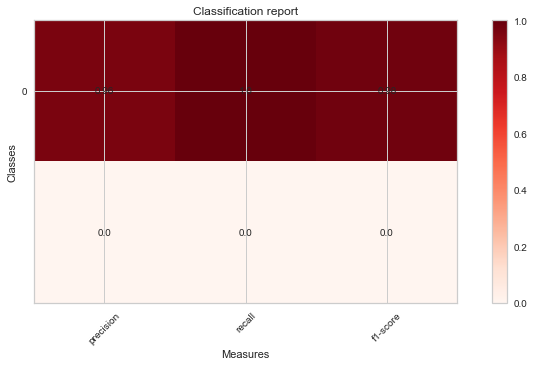

In [33]:
plot_classification_report(SVC_report)

<function matplotlib.pyplot.show(*args, **kw)>

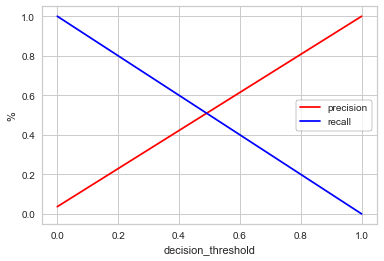

In [34]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, predicted)  
decision_threshold = np.append(thresholds, 1)

plt.plot(decision_threshold, precision, color='red')  
plt.plot(decision_threshold, recall, color='blue')  
leg = plt.legend(('precision', 'recall'), frameon=True)  
leg.get_frame().set_edgecolor('k')  
plt.xlabel('decision_threshold')  
plt.ylabel('%')  
plt.show

In [35]:
# Make predictions based on the test data
predictions = model.predict(test[predictors])

# Frame your 4th submission to Kaggle
kgl_submission_svm = pd.DataFrame({
        "ln": test["ln"],
        "curr_ln_delq_stas": predictions
    })

kgl_submission_svm.to_csv('svm_model.csv', index=False)